In [21]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

In [22]:
# Twitter API credentials

api_key = os.environ.get('TWITTER_API')
api_secret = os.environ.get('TWITTER_SECRET')
api_token = os.environ.get('TWITTER_TOKEN')
api_token_secret = os.environ.get('TWITTER_TOKEN_SECRET')

In [23]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(api_key, api_secret)

# Set the access token and access token secret
authenticate.set_access_token(api_token, api_token_secret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [24]:
# Extract 100 tweets from the twitter user (BillGates)
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Swhow the 5 recent tweets: \n")

i = 1

for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1
    

Swhow the 5 recent tweets: 

1) I had a great time answering questions about my new book, climate change, and COVID-19 on @reddit last week. Here’s a recap of the conversation. https://t.co/Kvd2blqXkL

2) RT @WHO: It's #WorldTBDay

Even as we battle #COVID19, we must not ease up the fight against #Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

3) I’m answering your questions now on @reddit: https://t.co/HXMsI0lSK1 https://t.co/XG7eAMNrGM

4) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on @reddit at 11:15: https://t.co/HXMsI0lSK1 https://t.co/SQ4N1MlxGO

5) After you finish your pancakes this morning, come ask me anything on @reddit at 11:15 Pacific Time: https://t.co/R3wfDhtqxD https://t.co/fAPRPUWQtu



In [26]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,I had a great time answering questions about m...
1,RT @WHO: It's #WorldTBDay\n\nEven as we battle...
2,I’m answering your questions now on @reddit: h...
3,"In this video, I answered some really good que..."
4,"After you finish your pancakes this morning, c..."


In [27]:
# Clean the text

# Create a function tu clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
    text = re.sub(r'#', '', text) # Removing # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    
    return text

# Cleaning the text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned DataFrame

df

,Tweets
0,I had a great time answering questions about m...
1,: It's WorldTBDay\n\nEven as we battle COVID19...
2,I’m answering your questions now on :
3,"In this video, I answered some really good que..."
4,"After you finish your pancakes this morning, c..."
...,...
95,I’m a big fan of author _yuval and was excited...
96,: “I will continue fighting. I will continue s...
97,Today is the 25th anniversary of my first book...
98,"This week, Rashida and I ask a big question th..."


In [28]:
# Create a function to get the subjectivity (How opined the text is)

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity (How positive/negative the text is)

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,I had a great time answering questions about m...,0.423737,0.312121
1,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000
2,I’m answering your questions now on :,0.000000,0.000000
3,"In this video, I answered some really good que...",0.866667,0.566667
4,"After you finish your pancakes this morning, c...",0.000000,0.000000
...,...,...,...
95,I’m a big fan of author _yuval and was excited...,0.533333,0.208333
96,: “I will continue fighting. I will continue s...,0.312500,0.062500
97,Today is the 25th anniversary of my first book...,0.393810,0.067143
98,"This week, Rashida and I ask a big question th...",0.470000,0.200000


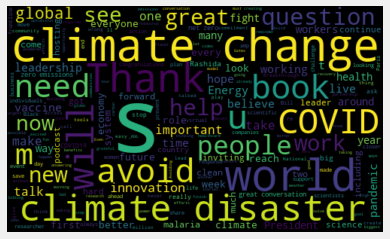

In [29]:
# Plot the Word Cloud

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the new Dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I had a great time answering questions about m...,0.423737,0.312121,Positive
1,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000,Neutral
2,I’m answering your questions now on :,0.000000,0.000000,Neutral
3,"In this video, I answered some really good que...",0.866667,0.566667,Positive
4,"After you finish your pancakes this morning, c...",0.000000,0.000000,Neutral
...,...,...,...,...
95,I’m a big fan of author _yuval and was excited...,0.533333,0.208333,Positive
96,: “I will continue fighting. I will continue s...,0.312500,0.062500,Positive
97,Today is the 25th anniversary of my first book...,0.393810,0.067143,Positive
98,"This week, Rashida and I ask a big question th...",0.470000,0.200000,Positive


In [33]:
# Print all of the positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j+=1

1) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. 

2) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15:  

3) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no one will be hurt more by climate change than the world’s poorest people. Here's how we can help them adapt. 

4) Congratulations  on this important role. I’m excited to see what you and the Earth Fund will achieve. Avoiding a climate disaster is going to take all of us, and I’m grateful for ’s leadership and partnership. 

5) Thank you  for a great conversation about climate change and thanks to  and  for hosting the event. 

6) Virologist Ruth Bishop pioneered the research that led to the discovery of rotavirus. Her legacy continues both as a role mode

In [34]:
# Print all of the negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j+=1

1) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

2) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

3) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

4) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 

6) There are several ways individuals can help move us closer to a zero-carbon future. Here are a few:

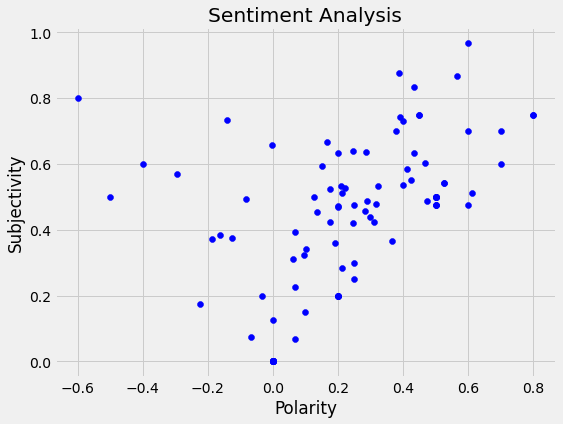

In [35]:
# Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [37]:
# Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
pteets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

72.0

In [39]:
# Get the percentage of negative tweets

ntweets = df[df.Analysis == 'Negative']
nteets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

13.0

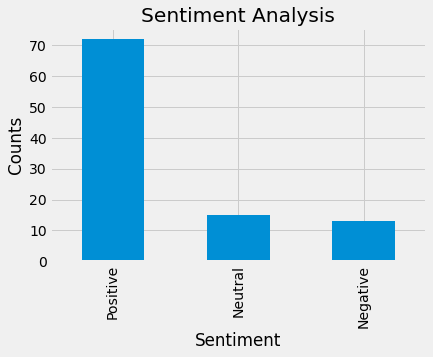

In [40]:
# Show the value counts

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()